In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
import seaborn as sns


data_all = pd.read_csv("D:/MachineLearningTraining/-MachineLearningTraining/Data/HoursePrices/train.csv")
test_all = pd.read_csv("D:/MachineLearningTraining/-MachineLearningTraining/Data/HoursePrices/test.csv")
print(data_all.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [220]:
print(data_all.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

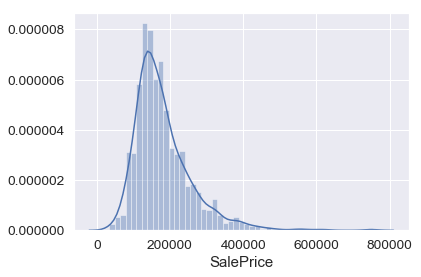

In [221]:
sns.distplot(data_all["SalePrice"])

In [222]:
print('skewness: {0}, kurtosis: {1}'.format(data_all['SalePrice'].skew(), data_all['SalePrice'].kurt()))

skewness: 1.8828757597682129, kurtosis: 6.536281860064529


In [223]:
print(data_all.shape)

(1460, 81)


[['MSSubClass' 'LotFrontage' 'LotArea']
 ['OverallQual' 'OverallCond' 'YearBuilt']
 ['YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1']
 ['BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF']
 ['1stFlrSF' '2ndFlrSF' 'LowQualFinSF']
 ['GrLivArea' 'BsmtFullBath' 'BsmtHalfBath']
 ['FullBath' 'HalfBath' 'BedroomAbvGr']
 ['KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces']
 ['GarageYrBlt' 'GarageCars' 'GarageArea']
 ['WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch']
 ['3SsnPorch' 'ScreenPorch' 'PoolArea']
 ['MiscVal' 'MoSold' 'YrSold']]


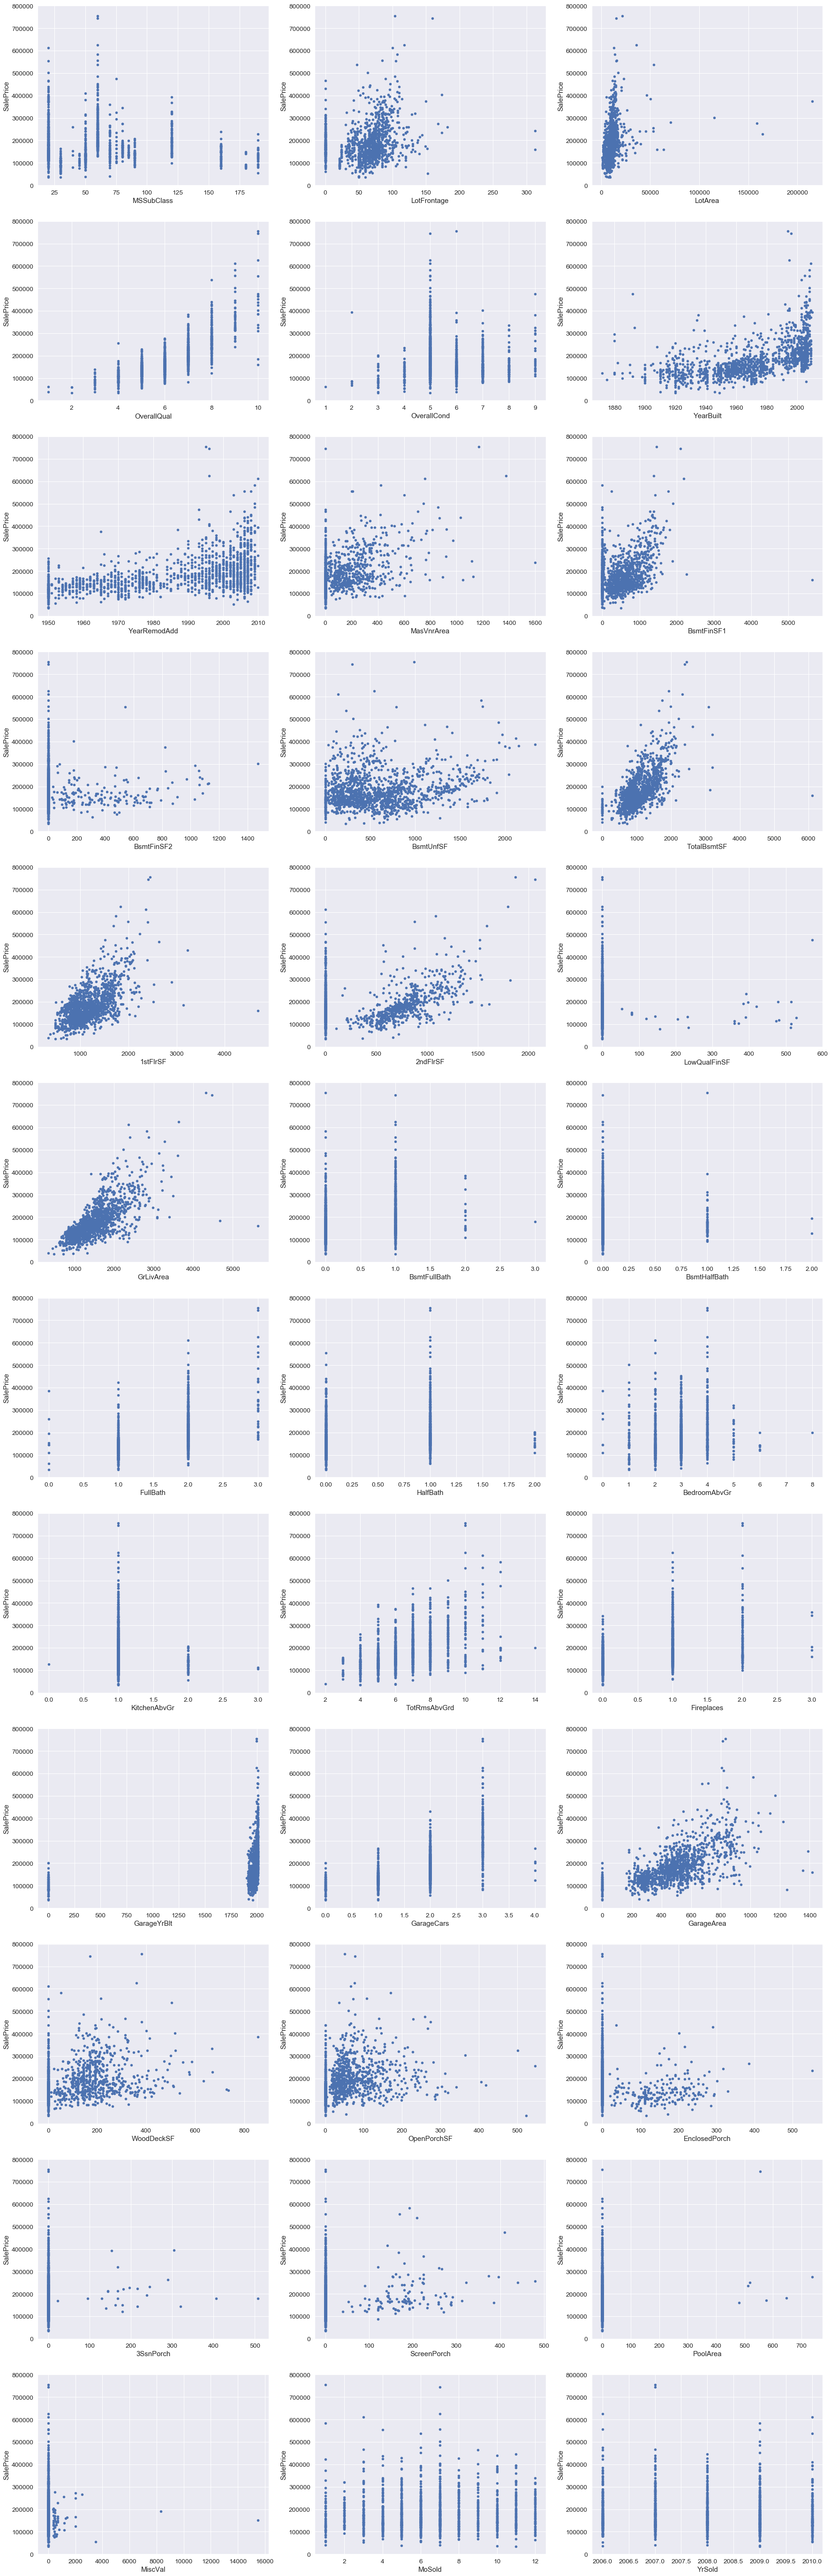

In [224]:
fig, axes = plt.subplots(nrows=12,ncols=3,figsize=(30,100))
data_columns_name_numbers = data_all.describe().columns.values.tolist()[1:37]
data_columns_name_not_numbers = data_all.columns.drop(data_columns_name_numbers).drop(["Id","SalePrice"]).values.tolist()
for c in data_columns_name_not_numbers:  # 类型变量缺失值补全
    data_all[c] = data_all[c].astype('category')
    if data_all[c].isnull().any():
        data_all[c] = data_all[c].cat.add_categories(['MISSING'])
        data_all[c] = data_all[c].fillna('MISSING')

# 连续变量缺失值补全 
quantity_miss_cal = data_all[data_columns_name_numbers].isnull().sum().sort_values(ascending=False)  # 缺失量均在总数据量的10%以下
missing_cols = quantity_miss_cal[quantity_miss_cal>0].index
data_all[missing_cols] = data_all[missing_cols].fillna(0.)  # 从这些变量的意义来看，缺失值很可能是取 0
data_all[missing_cols].isnull().sum()  # 验证缺失值是否都已补全

i =0
j = 0
for name in data_columns_name_numbers:
    data_all.plot.scatter(x=str(name),y="SalePrice",ylim=(0,800000),ax=axes[i][j])
    j = (j+1)%3
    if j == 0:
        i = i+1
numbers_name = np.array(data_columns_name_numbers).reshape(12,3)
print(numbers_name)

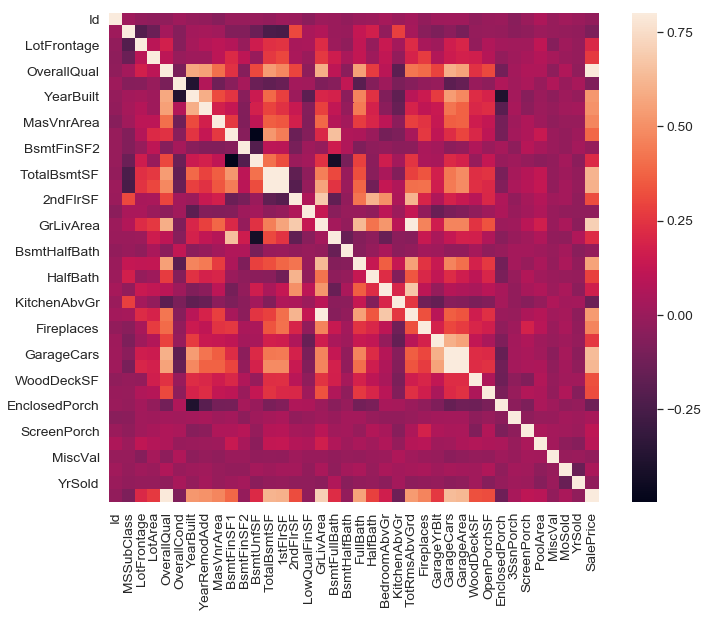

In [225]:
corrmat = data_all.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax=.8,square=True,ax=ax)
plt.show()

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'GarageYrBlt',
       'BsmtFullBath', 'BsmtUnfSF', 'LotFrontage', 'BedroomAbvGr',
       'ScreenPorch'],
      dtype='object')


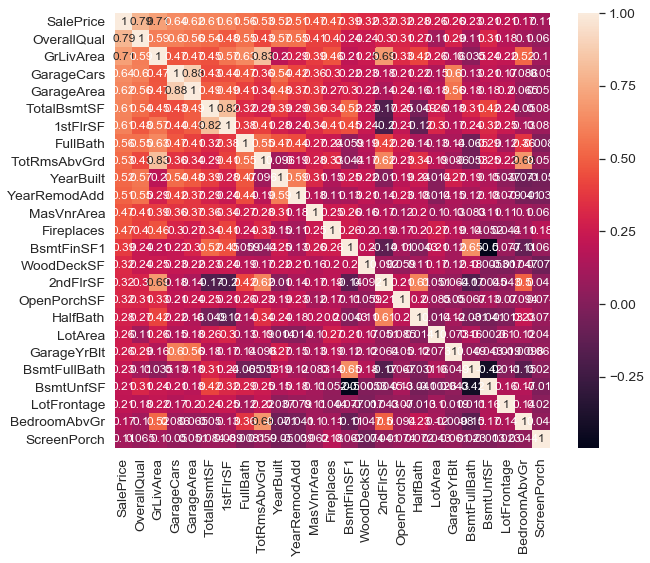

In [226]:
k = 25
top_name = corrmat.nlargest(k,"SalePrice").index
print(top_name)
top_mat = corrmat.loc[top_name,top_name]
fig,ax = plt.subplots(figsize=(10,8))
sns.set(font_scale = 1.25)
sns.heatmap(top_mat,annot=True,annot_kws={'size':12},square=True)
plt.show()

['FireplaceQu', 'Fence', 'HouseStyle', 'CentralAir', 'BsmtQual', 'GarageFinish', 'MSZoning', 'PoolQC', 'LotShape', 'Alley', 'LandContour', 'Condition1', 'MiscFeature', 'LotConfig', 'SaleType', 'SaleCondition', 'Electrical', 'Heating', 'BsmtExposure', 'KitchenQual', 'GarageQual', 'Utilities', 'RoofMatl', 'BsmtFinType2', 'ExterCond', 'ExterQual', 'Foundation', 'Condition2', 'GarageType', 'Exterior1st', 'MasVnrType', 'BsmtFinType1', 'GarageCond', 'Functional', 'RoofStyle', 'Street', 'BsmtCond', 'Neighborhood', 'Exterior2nd', 'PavedDrive', 'BldgType', 'LandSlope', 'HeatingQC']


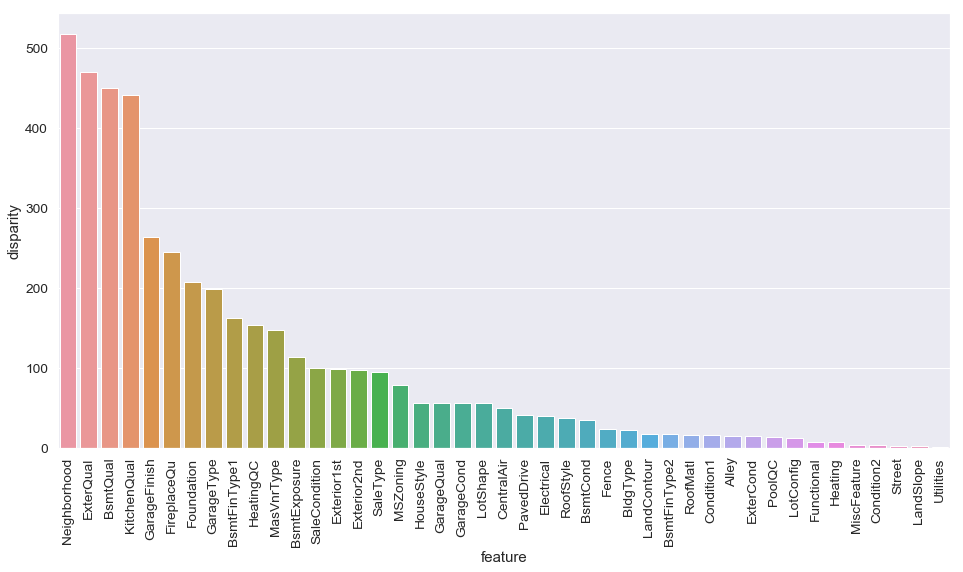

In [227]:
#通过各属性对SalePrices的方差影响来分析各属性
data_columns_name_numbers = data_all.describe().columns.values.tolist()
qualitative = list(set(data_all.columns.values.tolist()).difference(set(data_columns_name_numbers)))
print(qualitative)
def anova(frame, qualitative):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(data_all,qualitative)
a['disparity'] = np.log(1.0/a['pval'].values)
fig,ax = plt.subplots(figsize=(16,8))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.show()

In [228]:
def encode(frame,feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['price_mean'] = frame[[feature,'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('price_mean')
    ordering['order'] = range(1,ordering.shape[0]+1)
    ordering = ordering['order'].to_dict()
    for attr_v,score in ordering.items():
        frame.loc[frame[feature] == attr_v, feature+'_E'] = score

quality_encoded = []
i = 0
for q in qualitative:  
    print(i)
    i = i+1
    encode(data_all,q)
    quality_encoded.append(q+"_E")
data_all.drop(qualitative,axis=1,inplace=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


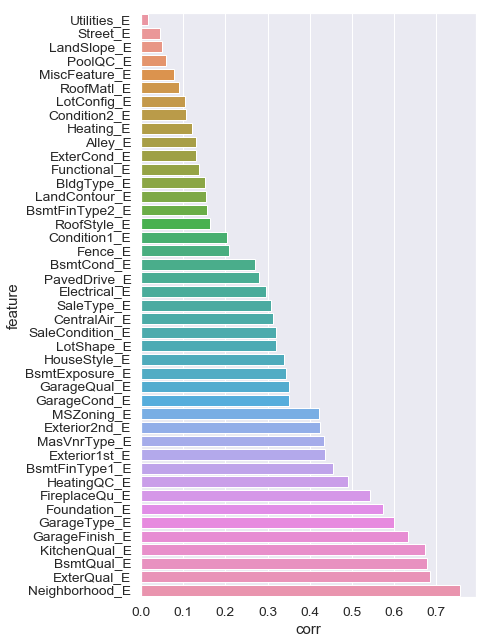

In [229]:
features = quality_encoded
spr = pd.DataFrame()
spr["feature"] = features
spr['corr'] = [data_all[f].corr(data_all["SalePrice"],'spearman')for f in features]
spr1 = spr.sort_values('corr')
plt.figure(figsize=(6,0.25*len(features)))
sns.barplot(data=spr1,y='feature',x='corr',orient='h')
plt.show()
useful_name1 = spr1.loc[:,"feature"][0:25].values.tolist()

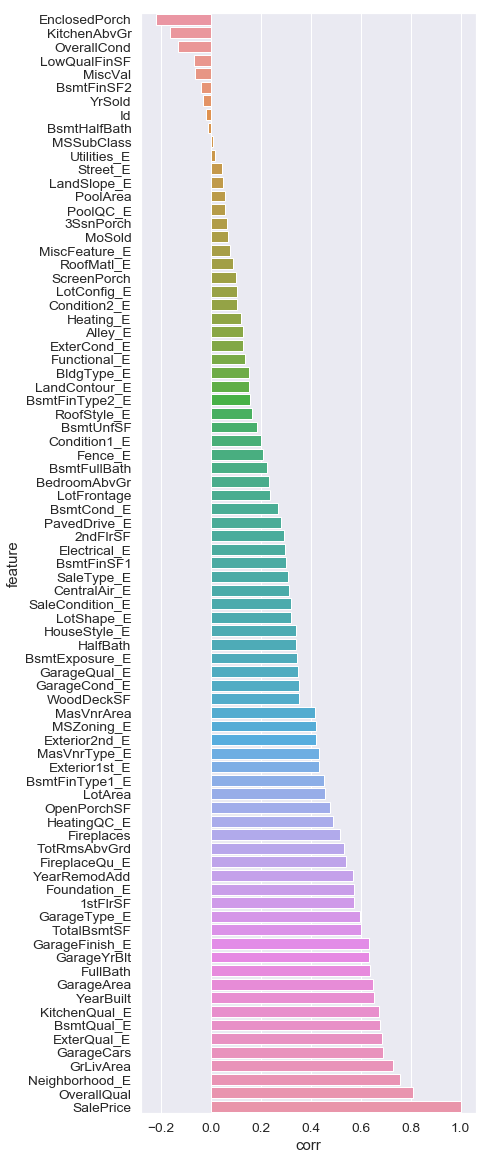

['EnclosedPorch', 'KitchenAbvGr', 'OverallCond', 'LowQualFinSF', 'MiscVal']


In [230]:
features = data_all.columns.values.tolist()
spr = pd.DataFrame()
spr["feature"] = features
spr['corr'] = [data_all[f].corr(data_all["SalePrice"],'spearman')for f in features]
spr = spr.sort_values('corr')
plt.figure(figsize=(6,0.25*len(features)))
sns.barplot(data=spr,y='feature',x='corr',orient='h')
plt.show()
useful_name = spr.loc[:,'feature'][0:5].values.tolist()
print(useful_name)

In [231]:
top_name = top_name.values.tolist()+useful_name1+useful_name
print(top_name)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'GarageYrBlt', 'BsmtFullBath', 'BsmtUnfSF', 'LotFrontage', 'BedroomAbvGr', 'ScreenPorch', 'Utilities_E', 'Street_E', 'LandSlope_E', 'PoolQC_E', 'MiscFeature_E', 'RoofMatl_E', 'LotConfig_E', 'Condition2_E', 'Heating_E', 'Alley_E', 'ExterCond_E', 'Functional_E', 'BldgType_E', 'LandContour_E', 'BsmtFinType2_E', 'RoofStyle_E', 'Condition1_E', 'Fence_E', 'BsmtCond_E', 'PavedDrive_E', 'Electrical_E', 'SaleType_E', 'CentralAir_E', 'SaleCondition_E', 'LotShape_E', 'EnclosedPorch', 'KitchenAbvGr', 'OverallCond', 'LowQualFinSF', 'MiscVal']


In [232]:
top_name = list(set(top_name))
data_train_x = data_all.loc[:,top_name]
data_train_y = data_all.loc[:,"SalePrice"]
print(data_train_x)
print(data_train_y)

      LotConfig_E  GrLivArea  GarageCars  LandContour_E  Functional_E  \
0             1.0       1710           2            2.0           7.0   
1             2.0       1262           2            2.0           7.0   
2             1.0       1786           2            2.0           7.0   
3             3.0       1717           3            2.0           7.0   
4             2.0       2198           3            2.0           7.0   
5             1.0       1362           2            2.0           7.0   
6             1.0       1694           2            2.0           7.0   
7             3.0       2090           2            2.0           7.0   
8             1.0       1774           2            2.0           4.0   
9             3.0       1077           1            2.0           7.0   
10            1.0       1040           1            2.0           7.0   
11            1.0       2324           3            2.0           7.0   
12            1.0        912           1           

In [233]:
print(data_train_x.loc[:,["LowQualFinSF","MiscVal","EnclosedPorch","LowQualFinSF","MiscVal","EnclosedPorch"]].describe())

       LowQualFinSF       MiscVal  EnclosedPorch  LowQualFinSF       MiscVal  \
count   1460.000000   1460.000000    1460.000000   1460.000000   1460.000000   
mean       5.844521     43.489041      21.954110      5.844521     43.489041   
std       48.623081    496.123024      61.119149     48.623081    496.123024   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000      0.000000   
75%        0.000000      0.000000       0.000000      0.000000      0.000000   
max      572.000000  15500.000000     552.000000    572.000000  15500.000000   

       EnclosedPorch  
count    1460.000000  
mean       21.954110  
std        61.119149  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       552.000000  


In [234]:
ret = list(set(top_name) ^ set(["LowQualFinSF","MiscVal","EnclosedPorch","LowQualFinSF","MiscVal","EnclosedPorch"]))
data_train_all = data_train_x.loc[:,ret]
ret.remove("SalePrice")
data_train_x = data_train_x.loc[:,ret]
print(data_train_x)

      LotConfig_E  GrLivArea  GarageCars  LandContour_E  Functional_E  \
0             1.0       1710           2            2.0           7.0   
1             2.0       1262           2            2.0           7.0   
2             1.0       1786           2            2.0           7.0   
3             3.0       1717           3            2.0           7.0   
4             2.0       2198           3            2.0           7.0   
5             1.0       1362           2            2.0           7.0   
6             1.0       1694           2            2.0           7.0   
7             3.0       2090           2            2.0           7.0   
8             1.0       1774           2            2.0           4.0   
9             3.0       1077           1            2.0           7.0   
10            1.0       1040           1            2.0           7.0   
11            1.0       2324           3            2.0           7.0   
12            1.0        912           1           

In [235]:
print(data_train_x.shape)
print(data_train_y.shape)

(1460, 51)
(1460,)


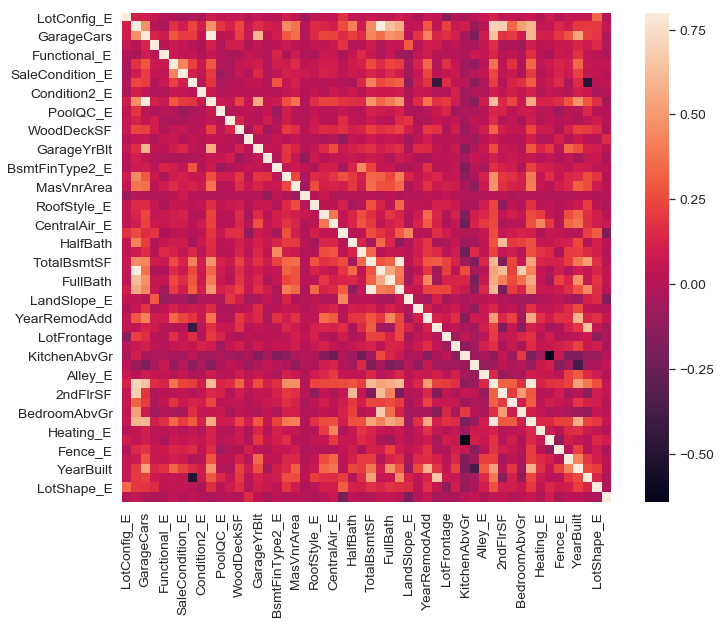

In [236]:
corrmat = data_train_all.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax=.8,square=True,ax=ax)
plt.show()

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [242]:
model = LinearRegression()
model.fit(data_train_x,np.log(data_train_y))
scores = cross_val_score(model,data_train_x,np.log(data_train_y),scoring='neg_mean_absolute_error',cv=10)
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))  #取平均值

[-0.10035399 -0.09370078 -0.09513177 -0.10906434 -0.10463583 -0.08709269
 -0.09479534 -0.09534351 -0.10363195 -0.09402643]
Mean Absolute Error 0.097778


# BEST：21179.693649
**25 25**